clustering fire data Natpinai Phonngam 6030808421

In [35]:
import pandas as pd
import numpy as np 
import datetime as dt

In [36]:
data = pd.read_excel("/Users/natpi/Desktop/geo data/data/Fire_Data.xlsx")

In [37]:
data

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


Transform Data

ทำการเช็คประเภทของข้อมูล

In [38]:
data.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

จัดการข้อมูลให้อยู่ในรูปแบบ hr:min

In [39]:
data['ACQ_TIME'] = (data['ACQ_TIME']/100).astype(str)
data['ACQ_TIME']=data['ACQ_TIME'].str.replace('.',':',regex=True)+':00'

ทำการแปลง column acq_time ให้เป็นข้อมูลประเภท datetime

In [40]:
data['ACQ_TIME'] = pd.to_timedelta(data['ACQ_TIME'])
data['DateTime']=data['ACQ_DATE']+data['ACQ_TIME']

ทำการเช็คประเภทของข้อมูล

In [41]:
data.dtypes

OBJECTID                int64
LATITUDE              float64
LONGITUDE             float64
BRIGHT_TI4            float64
SCAN                  float64
TRACK                 float64
ACQ_DATE       datetime64[ns]
ACQ_TIME      timedelta64[ns]
SATELLITE              object
INSTRUMENT             object
CONFIDENCE             object
VERSION                 int64
BRIGHT_TI5            float64
FRP                   float64
TYPE                    int64
DateTime       datetime64[ns]
dtype: object

แสดงข้อมูล 7 วัน

In [42]:
data2=data[data['DateTime'] <= (data['DateTime'].iloc[0] + pd.Timedelta(days=7))]

In [43]:
data2

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,20.10502,100.32304,339.4,0.45,0.47,2019-12-08,0 days 06:05:00,N,VIIRS,n,1,298.2,8.0,0,2019-12-08 06:05:00
809,810,20.10838,100.32633,344.4,0.45,0.47,2019-12-08,0 days 06:05:00,N,VIIRS,n,1,298.2,7.6,0,2019-12-08 06:05:00
810,811,20.03892,99.95753,339.8,0.48,0.48,2019-12-08,0 days 06:05:00,N,VIIRS,n,1,299.3,5.2,0,2019-12-08 06:05:00
811,812,19.15931,100.04431,341.4,0.49,0.49,2019-12-08,0 days 06:05:00,N,VIIRS,n,1,299.0,6.7,0,2019-12-08 06:05:00


Plot graph หาผลต่างของเวลา

In [44]:
data['delta']=data['DateTime']-data['DateTime'].iloc[0]
data['delmin']=(data['delta'].dt.total_seconds())/60

In [45]:
data

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime,delta,delmin
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,0 days 20:03:00,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,0 days 20:03:00,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,0 days 20:03:00,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,0 days 20:03:00,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0


In [46]:
data2 = data[data['DateTime'] <= (data['DateTime'].iloc[0] + pd.Timedelta(days=7))]

In [47]:
data2

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime,delta,delmin
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,0 days 06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,20.10502,100.32304,339.4,0.45,0.47,2019-12-08,0 days 06:05:00,N,VIIRS,n,1,298.2,8.0,0,2019-12-08 06:05:00,6 days 23:30:00,10050.0
809,810,20.10838,100.32633,344.4,0.45,0.47,2019-12-08,0 days 06:05:00,N,VIIRS,n,1,298.2,7.6,0,2019-12-08 06:05:00,6 days 23:30:00,10050.0
810,811,20.03892,99.95753,339.8,0.48,0.48,2019-12-08,0 days 06:05:00,N,VIIRS,n,1,299.3,5.2,0,2019-12-08 06:05:00,6 days 23:30:00,10050.0
811,812,19.15931,100.04431,341.4,0.49,0.49,2019-12-08,0 days 06:05:00,N,VIIRS,n,1,299.0,6.7,0,2019-12-08 06:05:00,6 days 23:30:00,10050.0


ทำการแสดงเฉพาะคอลัมน์ที่เลือกคือ LATITUDE,LONGITUDE,delmin 

In [48]:
data2 =data[["LATITUDE","LONGITUDE","delmin"]].head(813)
data2

,LATITUDE,LONGITUDE,delmin
0,16.33696,98.70137,0.0
1,16.48906,98.73961,0.0
2,16.93571,99.06874,0.0
3,16.54092,98.59869,0.0
4,16.87473,98.63222,0.0
...,...,...,...
808,20.10502,100.32304,10050.0
809,20.10838,100.32633,10050.0
810,20.03892,99.95753,10050.0
811,19.15931,100.04431,10050.0


In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt

พล็อตกราฟ ละติจูด ลองจิจูด ค่าต่างเวลา

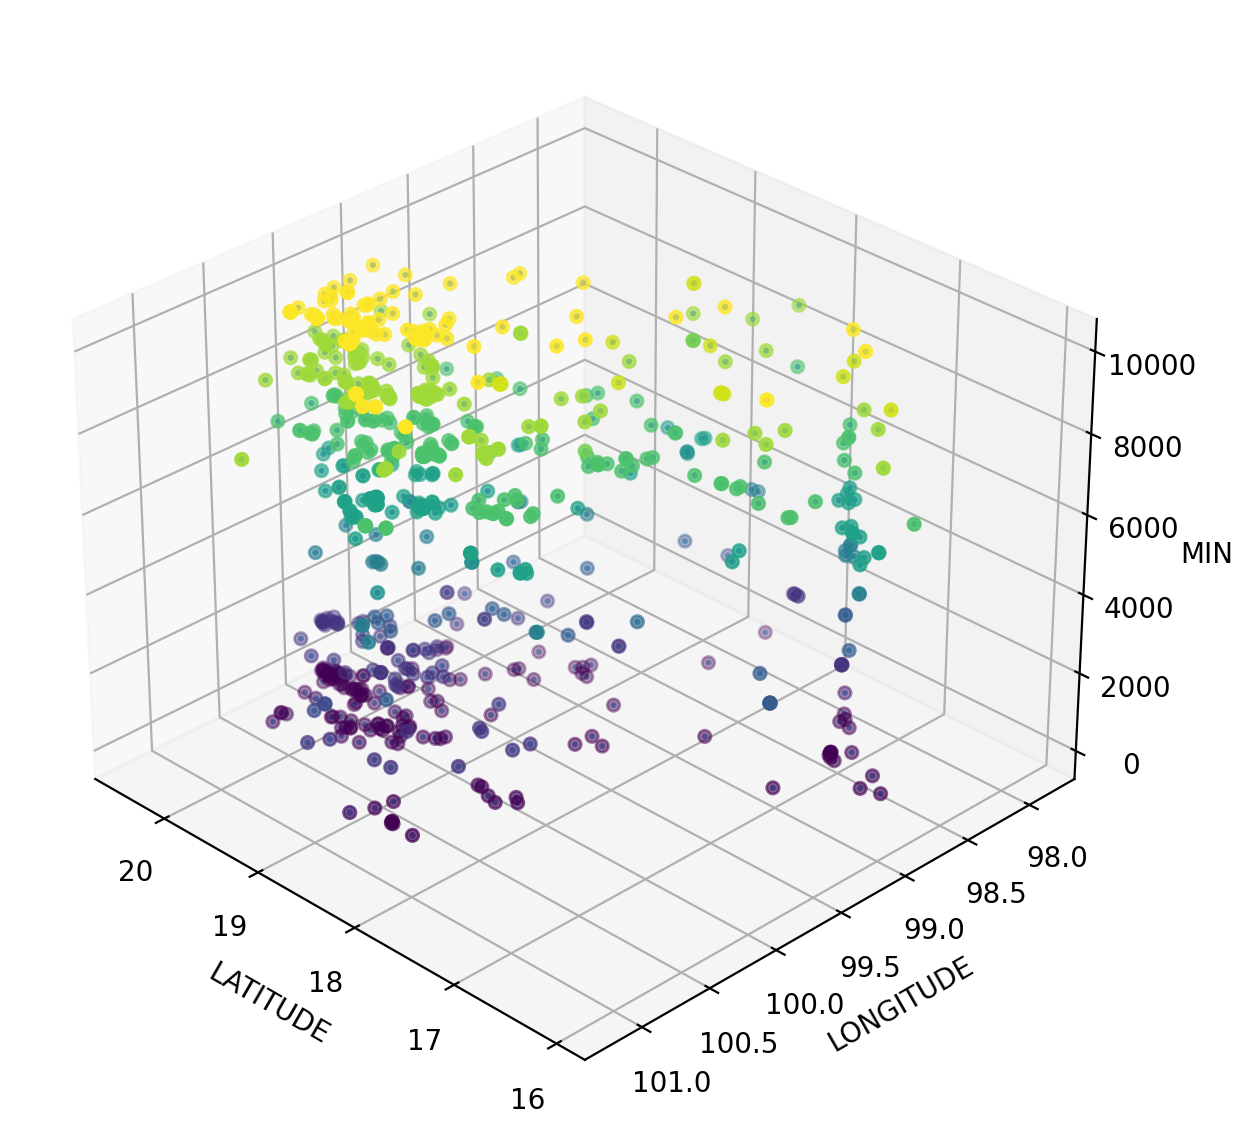

In [50]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=200

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = Axes3D(fig)
x=data2['LATITUDE']
y=data2['LONGITUDE']
z=data2['delmin']
ax.scatter(x,y,z,s=2)
ax.view_init(azim=135)
ax.set_xlabel('LATITUDE')
ax.set_ylabel('LONGITUDE')
ax.set_zlabel('MIN')
pnt3d=ax.scatter(x,y,z,c=z)

plt.show()

In [75]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [76]:
a = np.array(data2.values.tolist())

In [77]:
a

array([[   16.33696,    98.70137,     0.     ],
       [   16.48906,    98.73961,     0.     ],
       [   16.93571,    99.06874,     0.     ],
       ...,
       [   20.03892,    99.95753, 10050.     ],
       [   19.15931,   100.04431, 10050.     ],
       [   19.58155,   100.0533 , 10050.     ]])

In [78]:
db = DBSCAN(eps=3, min_samples=15).fit(a7)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dblabels = db.labels_
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_noise_ = list(dblabels).count(-1)

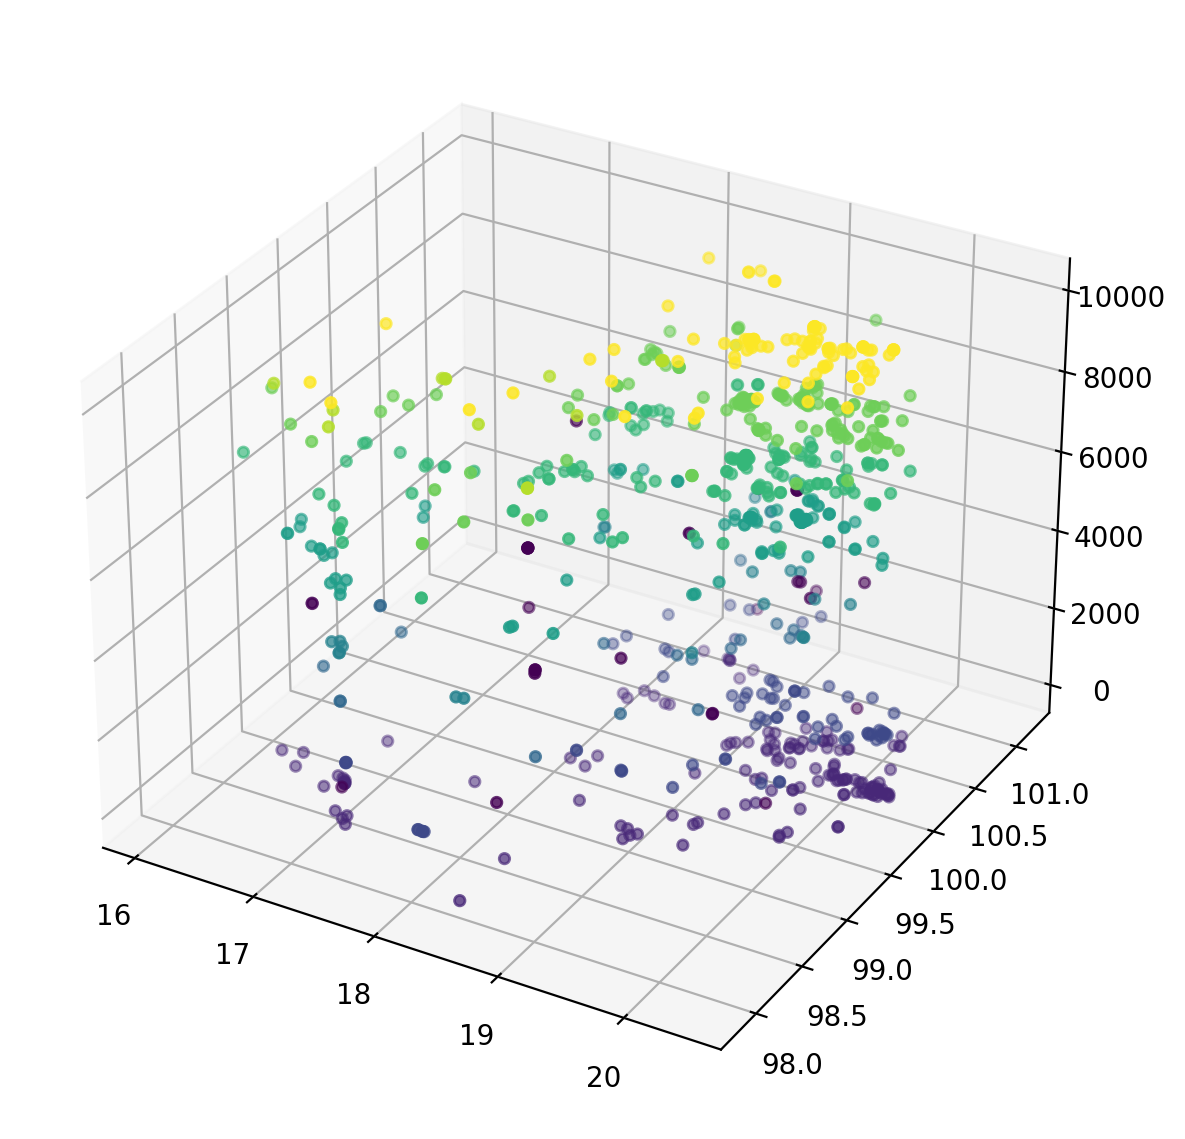

In [79]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(a[:,0], a[:,1], a[:,2], c=dblabels, s=14)
#ax.view_init(azim=200)
plt.show()

In [80]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(a, dblabels)

0.9335436250254477

ใช้เทคนิค Density Based Spatial Clustering of Applications with Noise โดยกำหนดค่าดังนี้ eps = 3 เพราะว่ายิ่ง eps น้อย ทำให้รัศมีข้อมูลที่เราจะพิจารณาน้อย ความกว้างของช่วงข้อมูลจึงยิ่งน้อยด้วย และ กำหนด min_sample = 15 เพื่อที่จะให้จัดข้อมูลเป็นกลุ่มหากข้อมูลมากกว่า 15  ผลลัพธ์ได้ค่า Silhoulette score = 0.9335436250254477   หมายความว่าแบบจำลองค่อนข้างดีเนื่องจากเข้าใกล้ 1  และ จุดที่เป็นสีม่วงคือข้อมูลที่เป็น outliers 